# Import necessary libraries and load dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import joblib

In [2]:
cr_loan = pd.read_csv('cr_loan2.csv')

## Dataset Exploration and EDA

In [3]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


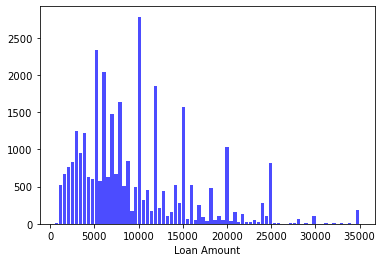

In [4]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

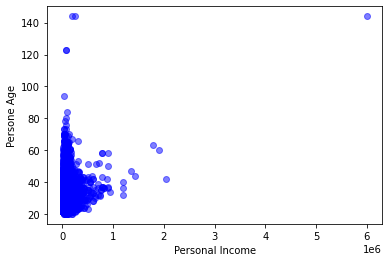

In [5]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [6]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [7]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [8]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


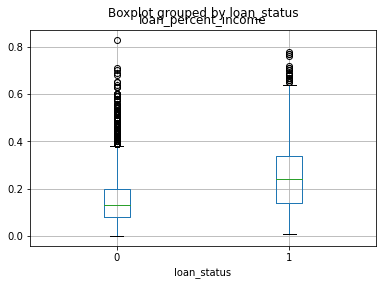

In [9]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.show()

In [10]:
 print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_int_rate'], aggfunc='mean').round(2))

loan_status                0      1
person_home_ownership              
MORTGAGE               10.06  13.43
OTHER                  11.41  13.56
OWN                    10.75  12.24
RENT                   10.75  12.97


In [11]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


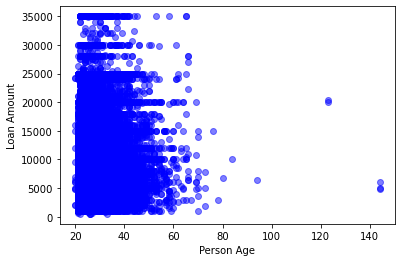

In [12]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

## Data Preparation
To ensure the dataset is suitable for modeling, we need to handle missing values, encode categorical variables, and split the data into training and testing sets.

### Handling Missing Values
Missing values can hinder the performance of predictive models. We identify columns with missing values and employ appropriate strategies to handle them. For instance, we fill the missing values in the loan_int_rate column with the mean value using the fillna() function

In [13]:
cr_loan.shape

(32581, 12)

In [14]:
cr_loan.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
cr_loan['loan_int_rate'].fillna(cr_loan['loan_int_rate'].mean(), inplace=True)
cr_loan.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [16]:
indices = cr_loan[cr_loan['person_emp_length'].isnull()].index
cr_loan.drop(indices, inplace=True)
cr_loan.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Encoding Categorical Variables
Categorical variables need to be encoded into a numerical format to be utilized in the logistic regression model. We identify categorical columns such as person_home_ownership, loan_intent, loan_grade, and cb_person_default_on_file. Using one-hot encoding, we transform these categorical variables into binary representations using the pd.get_dummies() function.

In [17]:
cr_loan.shape

(31686, 12)

In [18]:
cr_loan.person_home_ownership.value_counts()

RENT        16076
MORTGAGE    13093
OWN          2410
OTHER         107
Name: person_home_ownership, dtype: int64

In [19]:
# Encode the ordinal categorical variable 'person_home_ownership'
cut_mapping = {'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3}
cr_loan.person_home_ownership = cr_loan.person_home_ownership.map(cut_mapping)

In [20]:
cr_loan.person_home_ownership.value_counts()

0    16076
1    13093
2     2410
3      107
Name: person_home_ownership, dtype: int64

In [21]:
cr_loan.loan_intent.value_counts()

EDUCATION            6290
MEDICAL              5897
VENTURE              5556
PERSONAL             5369
DEBTCONSOLIDATION    5064
HOMEIMPROVEMENT      3510
Name: loan_intent, dtype: int64

In [22]:
# Encode the ordinal categorical variable 'loan_intent'
cut_mapping = {'EDUCATION': 0, 'MEDICAL': 1, 'VENTURE': 2, 'PERSONAL': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5}
cr_loan.loan_intent = cr_loan.loan_intent.map(cut_mapping)

In [23]:
cr_loan.loan_intent.value_counts()

0    6290
1    5897
2    5556
3    5369
4    5064
5    3510
Name: loan_intent, dtype: int64

In [24]:
cr_loan.loan_grade.value_counts()

A    10371
B    10186
C     6321
D     3556
E      952
F      236
G       64
Name: loan_grade, dtype: int64

In [25]:
# Encode the ordinal categorical variable 'loan_grade'
cut_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
cr_loan.loan_grade = cr_loan.loan_grade.map(cut_mapping)

In [26]:
cr_loan.loan_grade.value_counts()

0    10371
1    10186
2     6321
3     3556
4      952
5      236
6       64
Name: loan_grade, dtype: int64

In [27]:
cr_loan.cb_person_default_on_file.value_counts()

N    26057
Y     5629
Name: cb_person_default_on_file, dtype: int64

In [28]:
# Encode the ordinal categorical variable 'cb_person_default_on_file'
cut_mapping = {'N': 0, 'Y': 1}
cr_loan.cb_person_default_on_file = cr_loan.cb_person_default_on_file.map(cut_mapping)

In [29]:
cr_loan.cb_person_default_on_file.value_counts()

0    26057
1     5629
Name: cb_person_default_on_file, dtype: int64

In [30]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,3,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,0,1,1000,11.14,0,0.10,0,2
2,25,9600,1,1.0,1,2,5500,12.87,1,0.57,0,3
3,23,65500,0,4.0,1,2,35000,15.23,1,0.53,0,2
4,24,54400,0,8.0,1,2,35000,14.27,1,0.55,1,4


## Train_test_split
To evaluate the performance of our model, we split the data into training and testing sets. This ensures that we have independent datasets for model training and evaluation. We use the train_test_split() function from scikit-learn to split the data, allocating around 70% for training and 30% for testing.

In [31]:
X = cr_loan.drop('loan_status', axis=1)
y = cr_loan[['loan_status']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

## Logistic Regression
Once the data is prepared, we train a logistic regression model to predict loan default. We use the LogisticRegression class from scikit-learn and fit the model to the training data. The trained model learns the underlying patterns and relationships between the input features and the target variable.

In [33]:
clf_logit = LogisticRegression(solver='lbfgs')
clf_logit.fit(X_train, np.ravel(y_train))

LogisticRegression()

## Model Evaluation
After training the logistic regression model, we evaluate its performance using various metrics and visualizations. We generate a classification report that provides precision, recall, F1-score, and support for each class (non-default and default). Additionally, we plot a receiver operating characteristic (ROC) curve and calculate the area under the curve (AUC) to assess the model's predictive power.

In [34]:
clf_logit.score(X_test, y_test)

0.8287397433200084

In [35]:
y_pred = clf_logit.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred, target_names = ['Non-Default', 'Default']))

              precision    recall  f1-score   support

 Non-Default       0.85      0.96      0.90      7482
     Default       0.69      0.36      0.47      2024

    accuracy                           0.83      9506
   macro avg       0.77      0.66      0.68      9506
weighted avg       0.81      0.83      0.81      9506



In [37]:
prob_default = clf_logit.predict_proba(X_test)
prob_default

array([[0.90892059, 0.09107941],
       [0.08994062, 0.91005938],
       [0.93072715, 0.06927285],
       ...,
       [0.97528626, 0.02471374],
       [0.97681592, 0.02318408],
       [0.59554908, 0.40445092]])

In [38]:
prob_default = prob_default[:, 1]
prob_default

array([0.09107941, 0.91005938, 0.06927285, ..., 0.02471374, 0.02318408,
       0.40445092])

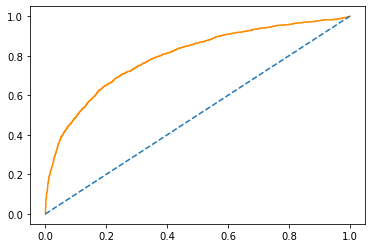

In [39]:
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [40]:
auc = roc_auc_score(y_test, prob_default)
auc

0.7957841903572526

In [41]:
confusion_matrix(y_test, y_pred)

array([[7156,  326],
       [1302,  722]], dtype=int64)

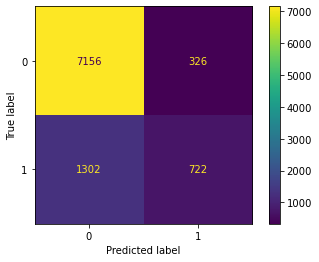

In [42]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=clf_logit.classes_).plot()
plt.show()

In [43]:
joblib.dump(clf_logit, 'model.joblib')

['model.joblib']

In [44]:
X_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
26073,35,83234,1,19.0,4,3,10000,18.250000,0.12,1,9
22,22,65000,0,4.0,0,3,34000,17.580000,0.52,0,4
23440,29,62500,1,13.0,4,1,5000,11.360000,0.08,0,7
32024,38,20004,2,2.0,5,1,6250,11.011695,0.31,0,15
908,22,54000,0,6.0,2,0,19000,11.011695,0.35,0,4
...,...,...,...,...,...,...,...,...,...,...,...
25291,28,82800,1,10.0,2,1,18000,11.011695,0.22,0,7
14432,25,106226,1,9.0,0,1,20000,12.180000,0.19,0,4
22937,32,60000,1,16.0,1,0,6000,6.620000,0.10,0,7
13680,23,95000,1,2.0,2,0,4000,7.880000,0.04,0,3


In [45]:
cr_loan.shape

(31686, 12)